<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> First section : Data cleaning  </center>

In this notebook you will be cleaning your dataset and making sure it's fully ready for modeling.

The used dataset is [Hepatitis C  dataset](https://www.kaggle.com/fedesoriano/hepatitis-c-dataset)

## Data preparation 
As a first step we need to prepare the data :

1. Read the data set as a data frame ( file name is HepatitisCdata.csv) 
2. The here are the column of your dataset:
    1) X (Patient ID/No.)
    2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') ( the target ) 
    3) Age (in years)
    4) Sex (f,m)
    Attributes 5 to 14 refer to laboratory data:
    5) ALB : Albumin Blood Test
    6) ALP : Alkaline phosphatase
    7) ALT : Alanine Transaminase
    8) AST : Aspartate Transaminase
    9) BIL : Bilirubin
    10) CHE : Acetylcholinesterase
    11) CHOL : Cholesterol
    12) CREA : Creatinine 
    13) GGT : Gamma-Glutamyl Transferase
    14) PROT : Proteins
    
3. Remember your model only accepts numbers so make sure you deal properly with the missing values and the data types and justify your solution choices 
 
4. Make sure the dataset shape in the end is : rows 615 and  14 columns 
 
5. Once finished save the cleaned dataset as "clean_HepatitisC.csv" file 
 

In [33]:
import pandas as pd 
import numpy as np

In [34]:
#To-Do: read the dataset 
data = pd.read_csv("HepatitisCdata.csv")

In [35]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [36]:
#To-Do  Start investigating the data types and correcting that 
# Provide explanation about each step in Markdown cells 
#Change columns type to numeric ones
#Add a fuction to convert category object to a numeric value by getting the first elemnt of the object
def convert_category(value):
    if value[0] == '0' and value[1] == 's':
        value = 1
    elif value[0] == '0':
        value = 0
    else:
        value = int(value[0]) + 1
    return float(value)
data['Category'] = data['Category'].apply(convert_category)
#Add a function to convert sex object to numeric values, 0 for male and 1 for female
def convert_sex(value):
    if value == 'm':
        value = '0'
    else:
        value = '1'
    return float(value)
data['Sex'] = data['Sex'].apply(convert_sex)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    float64
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    float64
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 67.4 KB


> Data types are all numeric Now ! Next we need to deal with missing values for the feature columns 

In [37]:
import seaborn as sns

#To-Do list all the columns that contain missing values along with their counts 

In [38]:
# To-Do Start providing solutions for each column that has missing data 
# Treat each case seperately 
# Hint : no data row should be deleted 
# Provide evidence that you filled those missing values after each step 
#Check Nan values for each colum
print(data.isna().sum())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ALB', ylabel='Density'>

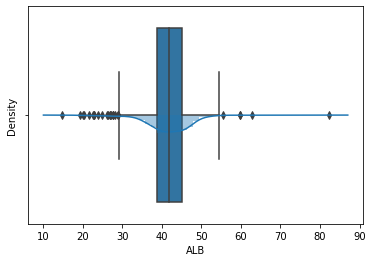

In [39]:
# Check distribution of each variable with missing values
# Plot - ALB
sns.boxplot(data['ALB'])
sns.distplot(data['ALB'])

/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ALP', ylabel='Density'>

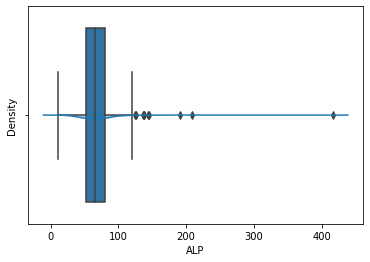

In [40]:
# Plot - ALP
sns.boxplot(data['ALP'])
sns.distplot(data['ALP'])

/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ALT', ylabel='Density'>

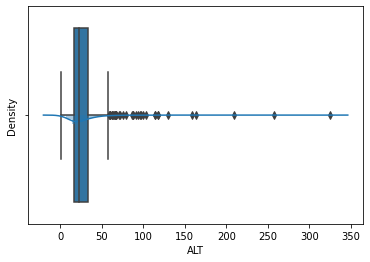

In [41]:
# Plot - ALT
sns.boxplot(data['ALT'])
sns.distplot(data['ALT'])

/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHOL', ylabel='Density'>

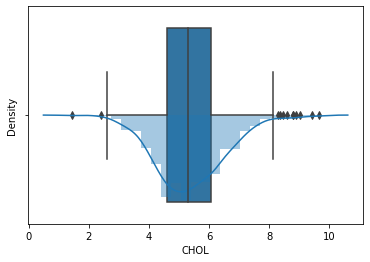

In [42]:
# Plot - CHOL
sns.boxplot(data['CHOL'])
sns.distplot(data['CHOL'])

/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/billel/jupyter/jupyterenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PROT', ylabel='Density'>

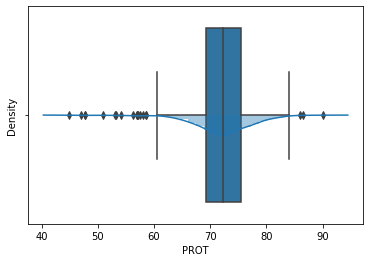

In [43]:
# Plot - PROT
sns.boxplot(data['PROT'])
sns.distplot(data['PROT'])

In [44]:
#Replace NaN values with with respective mean or median
data.fillna(data["ALB"].median(), inplace=True)
data.fillna(data["ALP"].mean(), inplace=True)
data.fillna(data["ALT"].median(), inplace=True)
data.fillna(data["CHOL"].mean(), inplace=True)
data.fillna(data["PROT"].median(), inplace=True)
print(data.isna().sum())

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


> We have no more missing data
As an optional thing we can also rename the first column as 'index' or "ID" instead of Unnamed 

In [45]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [46]:
data.rename(columns={'Unnamed: 0': "ID"}, inplace=True)

In [47]:
data

,ID,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0.0,32,0.0,38.5,52.50,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0.0,32,0.0,38.5,70.30,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0.0,32,0.0,46.9,74.70,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0.0,32,0.0,43.2,52.00,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0.0,32,0.0,39.2,74.10,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4.0,62,1.0,32.0,416.60,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4.0,64,1.0,24.0,102.80,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4.0,64,1.0,29.0,87.30,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4.0,46,1.0,33.0,41.95,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### 6. Save the clean dataset :

In [48]:
# Don't forget to drop the index 
data.to_csv('clean_dataset.csv', index=False)